## Python Principle Component Analysis exercise

### Problem. (Numerical test)
In the following example, we will learn how to perform the PCA(Principle Compoenet Analysis) for a
given set of vectors:
1. Generate 10 vectors {x^(i)}_j in R^50 such that {x^(i)}_j = rand(), for i=1:10, j=1:50.
2. Using PCA, find their lossy compression vectors in R^3.
3. Calculate decoding vectors d^(i) for each x^(i) and compute the error, sqrt((sigma_i=1 ^10 (||x^(i)-d^(i)||^2)/10)


#### Random Number Generation

the matrix X has the size : 10X50, choose random number in uniform distribution

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

x = np.zeros((10,50))

for i in range(0,10):
    for j in range(0,50):
        x[i,j] = random.uniform(0,1)
        
print('size of the random generation matrix is ',x.shape)

size of the random generation matrix is  (10, 50)


#### Singular Value Decomposition

Let A is a matrix given m by n, then  
SVD of A : A=USV^T where U : orthogonal matrix m by m, V : orthogonal matrix n by n, S : diagonal square matrix.

U : left singular vectors of A (eigenvectors of AA^T)  
V : right singular vectors of A (eigenvectors of A^TA)  
S : singular values (square root of eigenvalues of AA^T and A^TA)  

In [ ]:
 # help SVD
?np.linalg.svd

In [2]:
U,S,V = np.linalg.svd(x)

print('U_size = ',U.shape); print('S_size = ',S.shape); print('V_size = ',V.shape)

# Choose the principle components
V=V[:,0:3]
print('\nNew V size = ',V.shape)
print('\nSingular values = \n\n',S)

U_size =  (10, 10)
S_size =  (10,)
V_size =  (50, 50)

New V size =  (50, 3)

Singular values = 

 [11.81048764  2.71983583  2.43752564  2.3256526   2.11349133  1.79435499
  1.72721942  1.6296861   1.47519794  1.29676018]


#### Encode and Decode vector (find lossy compression vectors)

In [3]:
# encode vector
new_X = x @ V
print('size of encode vector = ',new_X.shape)

# decode vector 
decode_X = new_X @ V.transpose()
print('size of decode vector = ', decode_X.shape)
print('\ndimension reduced matrix = \n\n', new_X)

size of encode vector =  (10, 3)
size of decode vector =  (10, 50)

dimension reduced matrix = 

 [[-2.70864499 -0.31565232  0.04000976]
 [-1.87424358 -2.2922631   0.14623671]
 [-2.54208263 -1.6128693   1.66265704]
 [-2.70173788 -0.96695413  0.47903905]
 [-2.4509683  -0.70583305  0.17242608]
 [-3.15838243 -1.18259586  0.32651103]
 [-2.00219255 -1.69205609 -0.01583782]
 [-2.22573713 -1.48845859  0.26467356]
 [-2.64040193 -1.60380129 -0.11107972]
 [-2.13734509 -1.12198053  0.63333968]]


#### Grapical Output (3-dimensional scatter plot)

<Figure size 648x360 with 0 Axes>

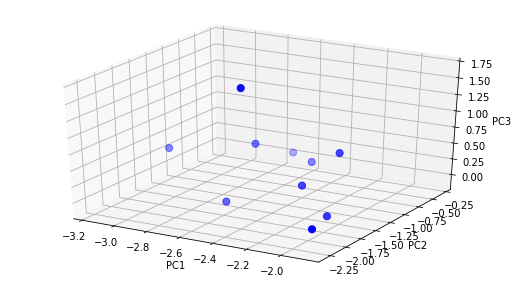

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
plt.rcParams["figure.figsize"] = (9, 5);
fig = plt.figure();
ax = plt3d = plt.figure().gca(projection='3d');
ax.scatter(new_X[:,0],new_X[:,1],new_X[:,2],c='b',s=50);
ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3');

#### Compute the error

In [5]:
Error = np.sqrt(np.sum(np.linalg.norm(decode_X - x)**2)/10)
print('\nThe Error between decode vectors and original data is : ',Error)


The Error between decode vectors and original data is :  3.0164329600982347
